<h1> 16장 이미지 인식의 꽃, CNN 익히기 </h1> <br>
MNIST 데이터셋을 사용해 손글씨 이미지를 딥러닝을 통해 읽어보자.<br>
MNIST 데이터셋이란 미국 국립표준기술원이 손글씨를 이용해 만든 데이터로 구성되어 있으며 <br>
70,000개의 글자 이미지에 0~9까지 이름표를 붙인 데이터셋!

In [5]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

# MNIST 데이터셋에서는 70,000개의 이미지 중 60,000개를 학습용, 10,000개를 테스트용으로 미리 구분!
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 주어진 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열으로 바꿔주기 위해 reshape()함수 사용!
# reshpae(총 샘플 수, 1차원 속성의 수)
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

케라스는 데이터를 0에서 1 사이의 값으로 변환한 다음 구동할 때 최적의 성능을 보이므로 0~255 사이의 값을 0~1의 값으로 변환해야 함!<br>
그래서 255로 나누는데 이렇게 데이터 폭이 클 때 적절한 값으로 분산의 정도를 바꿔주는 걸 <strong>데이터 정규화</strong>라고 함!<br>
255로 나누면 0.~가 되므로 실수형(float32)로 데이터타입을 변환시켜줌.<br>
그리고 클래스가 10(0~9)개 이므로 <strong>원-핫 인코딩</strong> 방식을 사용해 0,1로 된 벡터로 값을 수정시켜줘야함.<br>
따라서 <strong>np_utils.to_categorical()</strong>함수 사용.


Epoch 00001: val_loss improved from inf to 0.15399, saving model to ./model/01-0.1540.hdf5

Epoch 00002: val_loss improved from 0.15399 to 0.10104, saving model to ./model/02-0.1010.hdf5

Epoch 00003: val_loss improved from 0.10104 to 0.08197, saving model to ./model/03-0.0820.hdf5

Epoch 00004: val_loss improved from 0.08197 to 0.06997, saving model to ./model/04-0.0700.hdf5

Epoch 00005: val_loss improved from 0.06997 to 0.06670, saving model to ./model/05-0.0667.hdf5

Epoch 00006: val_loss improved from 0.06670 to 0.06412, saving model to ./model/06-0.0641.hdf5

Epoch 00007: val_loss improved from 0.06412 to 0.06254, saving model to ./model/07-0.0625.hdf5

Epoch 00008: val_loss did not improve from 0.06254

Epoch 00009: val_loss improved from 0.06254 to 0.05767, saving model to ./model/09-0.0577.hdf5

Epoch 00010: val_loss did not improve from 0.05767

Epoch 00011: val_loss did not improve from 0.05767

Epoch 00012: val_loss did not improve from 0.05767

Epoch 00013: val_loss did n

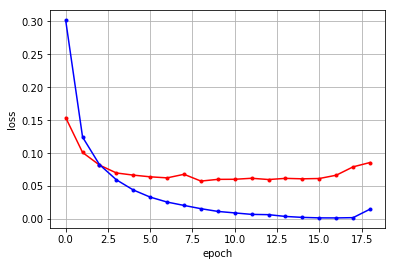

In [7]:
model = Sequential()
model.add(Dense(512, input_dim= 784, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose=1, save_best_only= True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test,Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

그래프를 보면 학습셋(파란선)에 대한 오차는 계속해서 줄어들고 있고 테스트셋(빨간 선)은 과적합이 일어나기 전에 학습을 끝냄!